In [1]:
import sys
sys.path.append('../modules')
import likelihood_predictor
from likelihood_predictor import PlastPredictor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import zscore
import pickle

In [2]:
pl_full = pd.read_pickle('../database/plasticizer_data_v10_polarity.pkl')
pl_pol = pd.concat([pl_full[pl_full.columns[1:195]], pl_full['Polarity']], axis=1)
all_cols = pl_pol.columns.to_numpy()
pl_data = pl_pol[all_cols].to_numpy()
lin_data = pd.read_pickle('../database/linolein_test.pkl')
lin_data['Polarity'] = 0.048856
lin_data = lin_data[all_cols].to_numpy()
org_full = pd.read_pickle('../database/org_polarity_v2.pkl')

In [3]:
psim1 = open("pubs_similarity.txt", 'r')
psim11 = [line.rstrip('\n') for line in psim1]
psim2 = open("pubs_othersim.txt", 'r')
psim22 = [line.rstrip('\n') for line in psim2]

In [4]:
org_full
org_full['Dsim'] = psim11
org_full['Nasim'] = psim22

In [5]:
org_full = org_full.sort_values(by ='Dsim')

In [6]:
org_full = org_full[:5000]
org_data = org_full[all_cols].to_numpy()

In [7]:
reg_param = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]
org_acc = []
pl_acc = []

for i in reg_param:
    pp = PlastPredictor(i)
    pp_model = pp.fit_model(pl_data, org_data)
    org_acc.append(pp.predict(org_data, type='binary',class_id='neg'))
    pl_acc.append(pp.predict(pl_data, type='binary', class_id='pos'))
    lin_prob = pp.predict(lin_data)

Text(0, 0.5, 'organics accuracy')

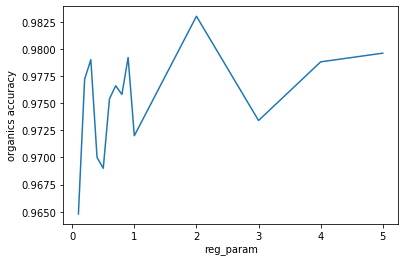

In [11]:
plt.plot(reg_param, org_acc)
plt.xlabel('reg_param')
plt.ylabel('organics accuracy')

Text(0, 0.5, 'plasticizer accuracy')

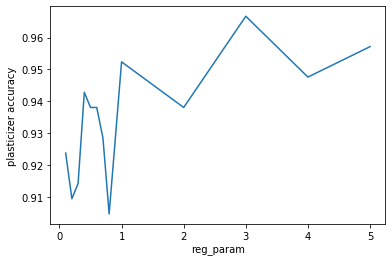

In [12]:
plt.plot(reg_param, pl_acc)
plt.xlabel('reg_param')
plt.ylabel('plasticizer accuracy')

In [13]:
pl_probs = pp.predict(pl_data)
pl_smiles = pl_full['SMILES'].to_numpy()
org_probs = pp.predict(org_data)
org_smiles = org_full['SMILES'].to_numpy()

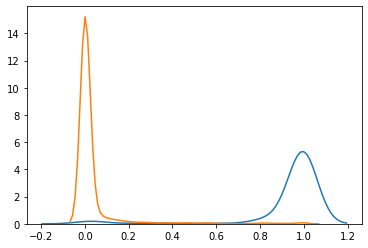

In [14]:
sns.distplot(pl_probs, hist=False)
sns.distplot(org_probs, hist=False)
plt.show()